In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as ss
import seaborn as sns
from scipy.optimize import curve_fit

In [63]:
global_temperatures = pd.read_csv('GlobalTemperatures.csv')
global_state_temperatures = pd.read_csv('GlobalLandTemperaturesByState.csv')
global_majorcity_temperatures = pd.read_csv('GlobalLandTemperaturesByMajorCity.csv')
global_country_temperatures = pd.read_csv('GlobalLandTemperaturesByCountry.csv')

In [64]:
global_country_temperatures.set_index('dt', inplace = True)

In [65]:
global_country_temperatures.index = pd.to_datetime(global_country_temperatures.index, format = "%Y-%m-%d")
global_country_temperatures.sort_index(inplace = True)
global_country_temperatures.dropna(axis = 1, how = 'all', inplace = True)
global_country_temperatures['MovingAverage'] = global_country_temperatures.AverageTemperature.rolling('365D', center = True).mean()

In [66]:
def normalise(x):
    ''' Function to normalise the data'''
    
    x = pd.to_numeric(x, errors='coerce')  
    return(x - x.mean(numeric_only = True)) / x.std(numeric_only = True)

In [67]:
global_temperatures.set_index('dt', inplace = True)
global_temperatures.index = pd.to_datetime(global_temperatures.index, format = "%Y-%m-%d")
global_temperatures.sort_index(inplace = True)
global_temperatures.dropna(axis = 1, how = 'all', inplace = True)
normalised_global_temperature = global_temperatures.transform(normalise)

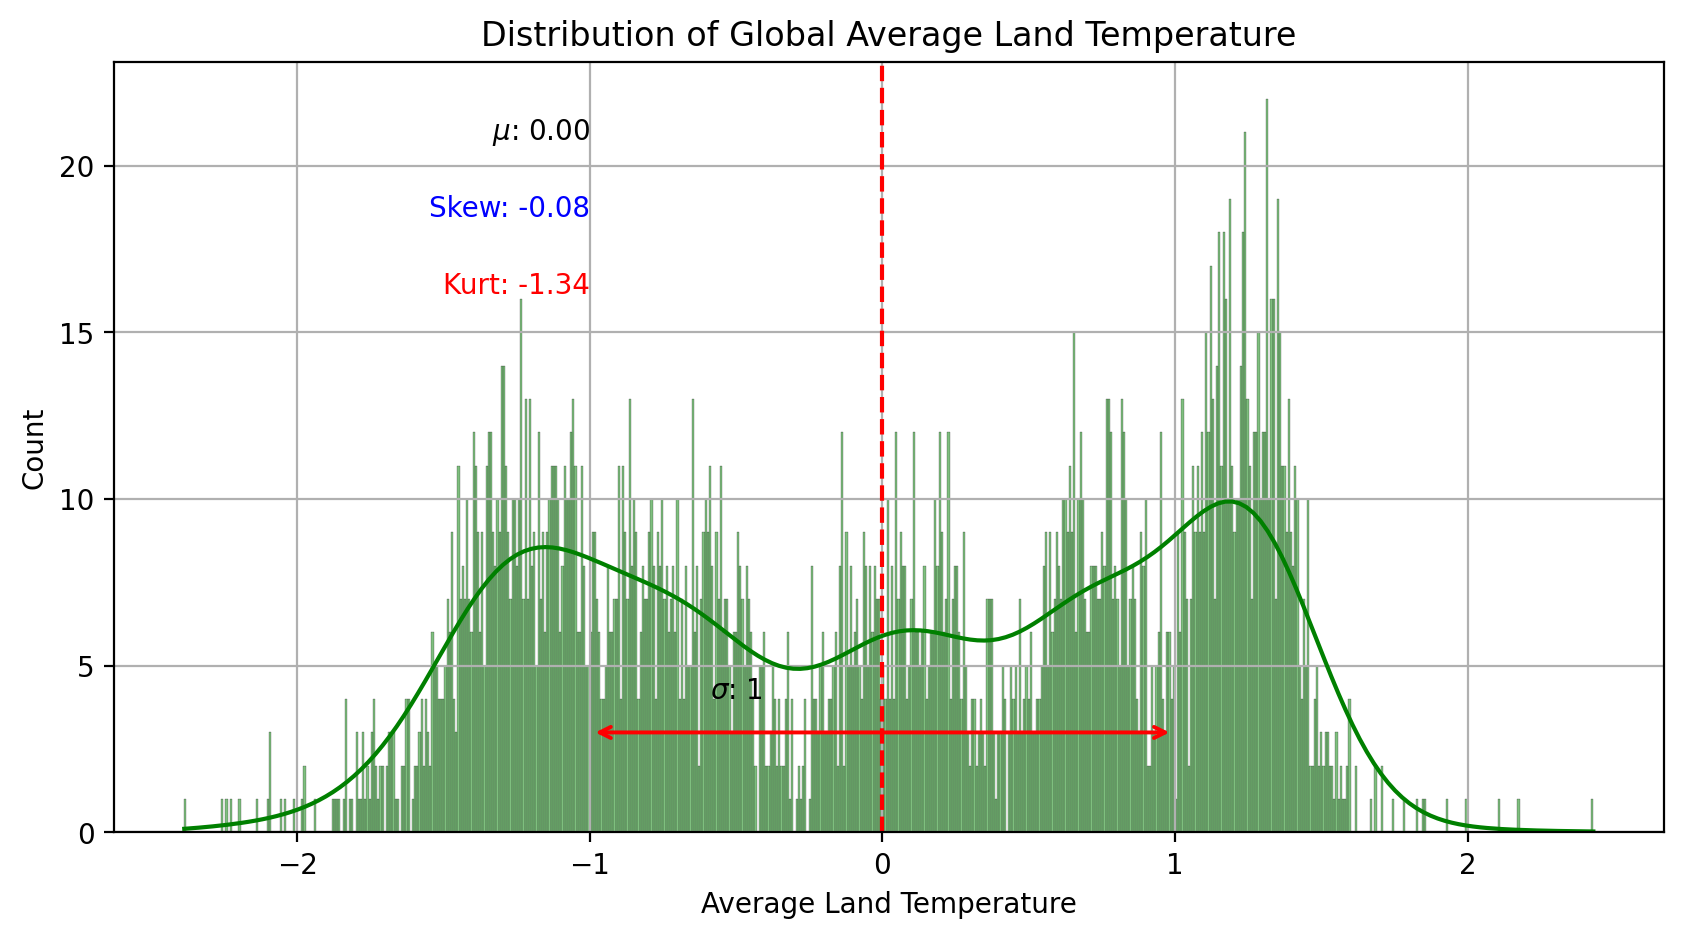

In [68]:
def global_land_temperature_trend():
    ''' Histogram plot to show the global average land temperature '''
    
    mean = normalised_global_temperature.LandAverageTemperature.mean()
    std = normalised_global_temperature.LandAverageTemperature.std()
    skew = normalised_global_temperature.LandAverageTemperature.skew()
    kurtosis = normalised_global_temperature.LandAverageTemperature.kurtosis()

    plt.figure(dpi = 200, figsize = (10, 5))

    sns.histplot(normalised_global_temperature.LandAverageTemperature, bins = 650, color = 'green', kde = True)

    plt.axvline(mean, color = 'red', linestyle='--', label='Mean')
    plt.text(mean - std, plt.ylim()[1] * 0.9, f'$\mu$: {mean:.2f}', horizontalalignment = 'right')

    plt.annotate('', xy = (mean - std, 3), xytext = (mean + std, 3),
                 arrowprops = dict(arrowstyle = '<->', lw = 1.4, color = 'red'))

    plt.text(mean - 0.5 * std, 4, f'$\sigma$: {std:0g}', horizontalalignment = 'center')
    plt.text(mean - std, plt.ylim()[1] * 0.8, f'Skew: {skew:.2f}', horizontalalignment = 'right', color = 'b')
    plt.text(mean - std, plt.ylim()[1] * 0.7, f'Kurt: {kurtosis:.2f}', horizontalalignment = 'right', color = 'r')
    plt.xlabel('Average Land Temperature')
    plt.title('Distribution of Global Average Land Temperature')
    plt.grid(True)  
    plt.savefig('/Users/preethu/Clustering & Fitting Images/Image1.png')
    plt.show()

global_land_temperature_trend()

In [69]:
india_temperature = global_country_temperatures[(global_country_temperatures['Country'] == 'India')].copy()
normalised_india_temperature = india_temperature.transform(normalise)
normalised_global_temperature['MovingAverage'] = normalised_global_temperature.LandAverageTemperature.rolling('365D', center = True).mean()
normalised_india_temperature['MovingAverage'] = normalised_india_temperature.AverageTemperature.rolling('365D', center = True).mean()

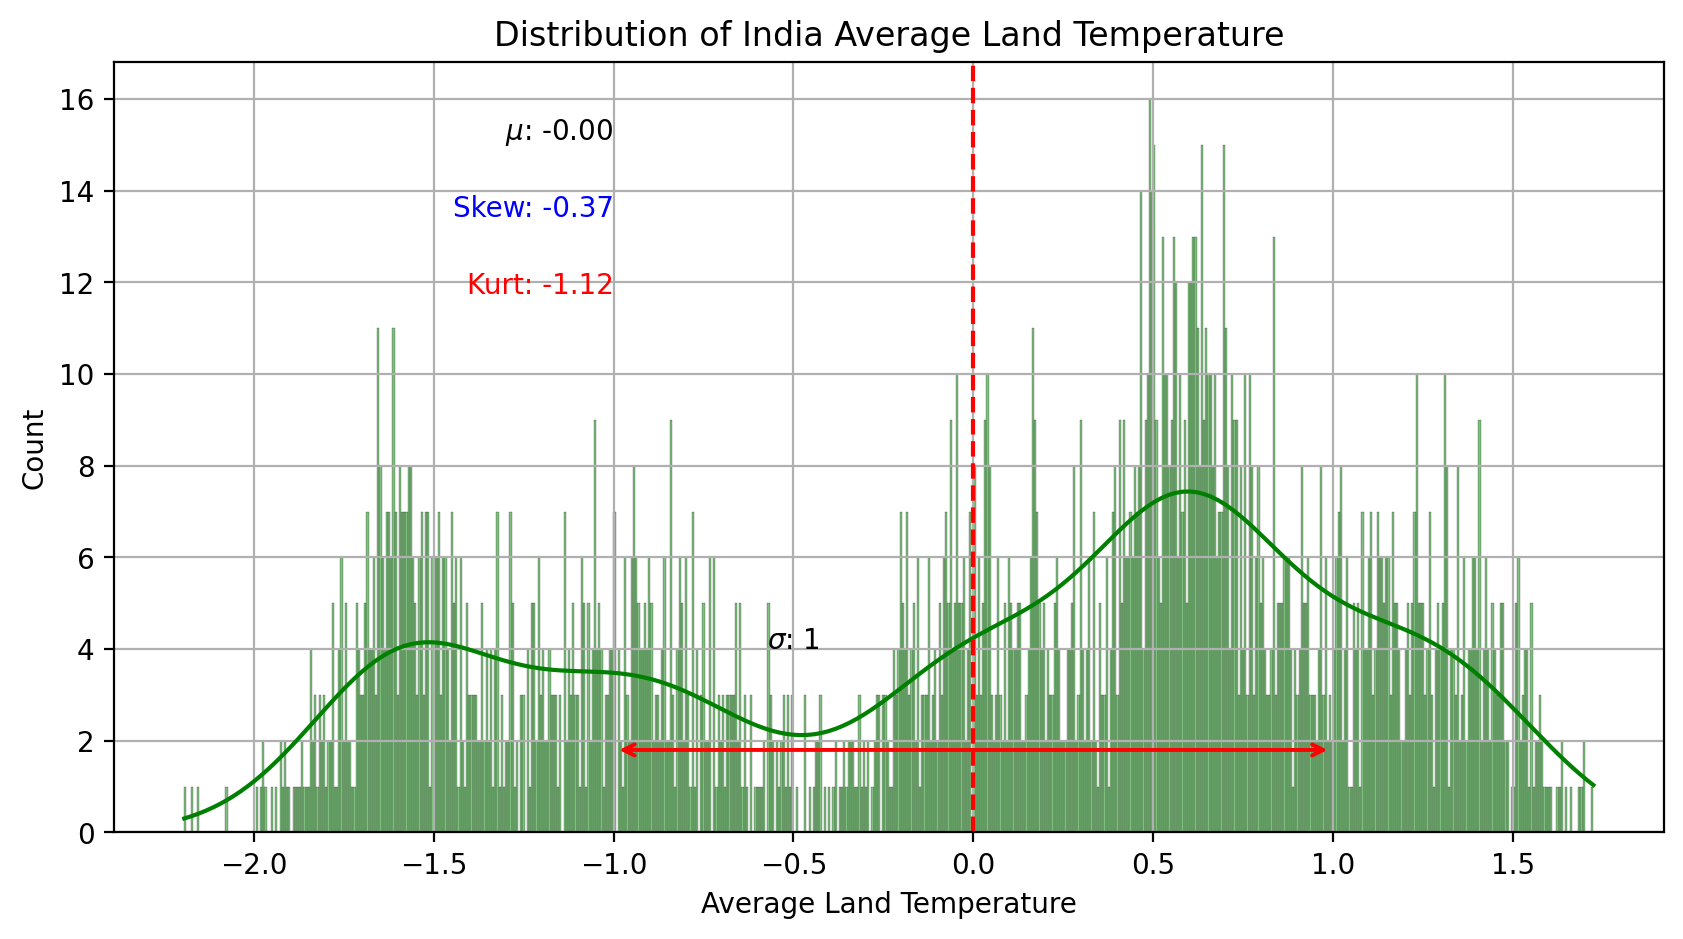

In [70]:
def india_land_temperature_trend():    
    ''' Histogram plot to show the India average land temperature '''
    
    mean = normalised_india_temperature.AverageTemperature.mean()
    std = normalised_india_temperature.AverageTemperature.std()
    skew = normalised_india_temperature.AverageTemperature.skew()
    kurtosis = normalised_india_temperature.AverageTemperature.kurtosis()

    plt.figure(dpi = 200, figsize = (10, 5))
    sns.histplot(normalised_india_temperature.AverageTemperature, bins = 650, color = 'green', kde = True)

    plt.axvline(mean, color = 'red', linestyle = '--', label = 'Mean')
    plt.text(mean - std, plt.ylim()[1]*0.9, f'$\mu$: {mean:.2f}', horizontalalignment='right')

    plt.annotate('', xy = (mean-std, 1.8), xytext = (mean + std, 1.8), 
            arrowprops = dict(arrowstyle = '<->', lw = 1.4, color = 'red'))

    plt.text(mean - 0.5 *std, 4, f'$\sigma$: {std:0g}', horizontalalignment = 'center')
    plt.text(mean - std, plt.ylim()[1] * 0.8, f'Skew: {skew:.2f}', horizontalalignment = 'right', color = 'b')
    plt.text(mean - std, plt.ylim()[1] * 0.7, f'Kurt: {kurtosis:.2f}', horizontalalignment = 'right', color = 'r')
    plt.title('Distribution of India Average Land Temperature')
    plt.grid(True)    
    plt.xlabel('Average Land Temperature')
    plt.savefig('/Users/preethu/Clustering & Fitting Images/Image2.png')
    plt.show()

india_land_temperature_trend()

Global minimum average temperature
 dt
1752-04-01   -0.814459
Name: MovingAverage, dtype: float64
Global maximum average temperature
 dt
2015-10-01    0.752519
Name: MovingAverage, dtype: float64
India minimum average temperature
 dt
1812-08-01   -2.171798
Name: MovingAverage, dtype: float64
India maximum average temperature
 dt
2013-09-01    1.015257
Name: MovingAverage, dtype: float64


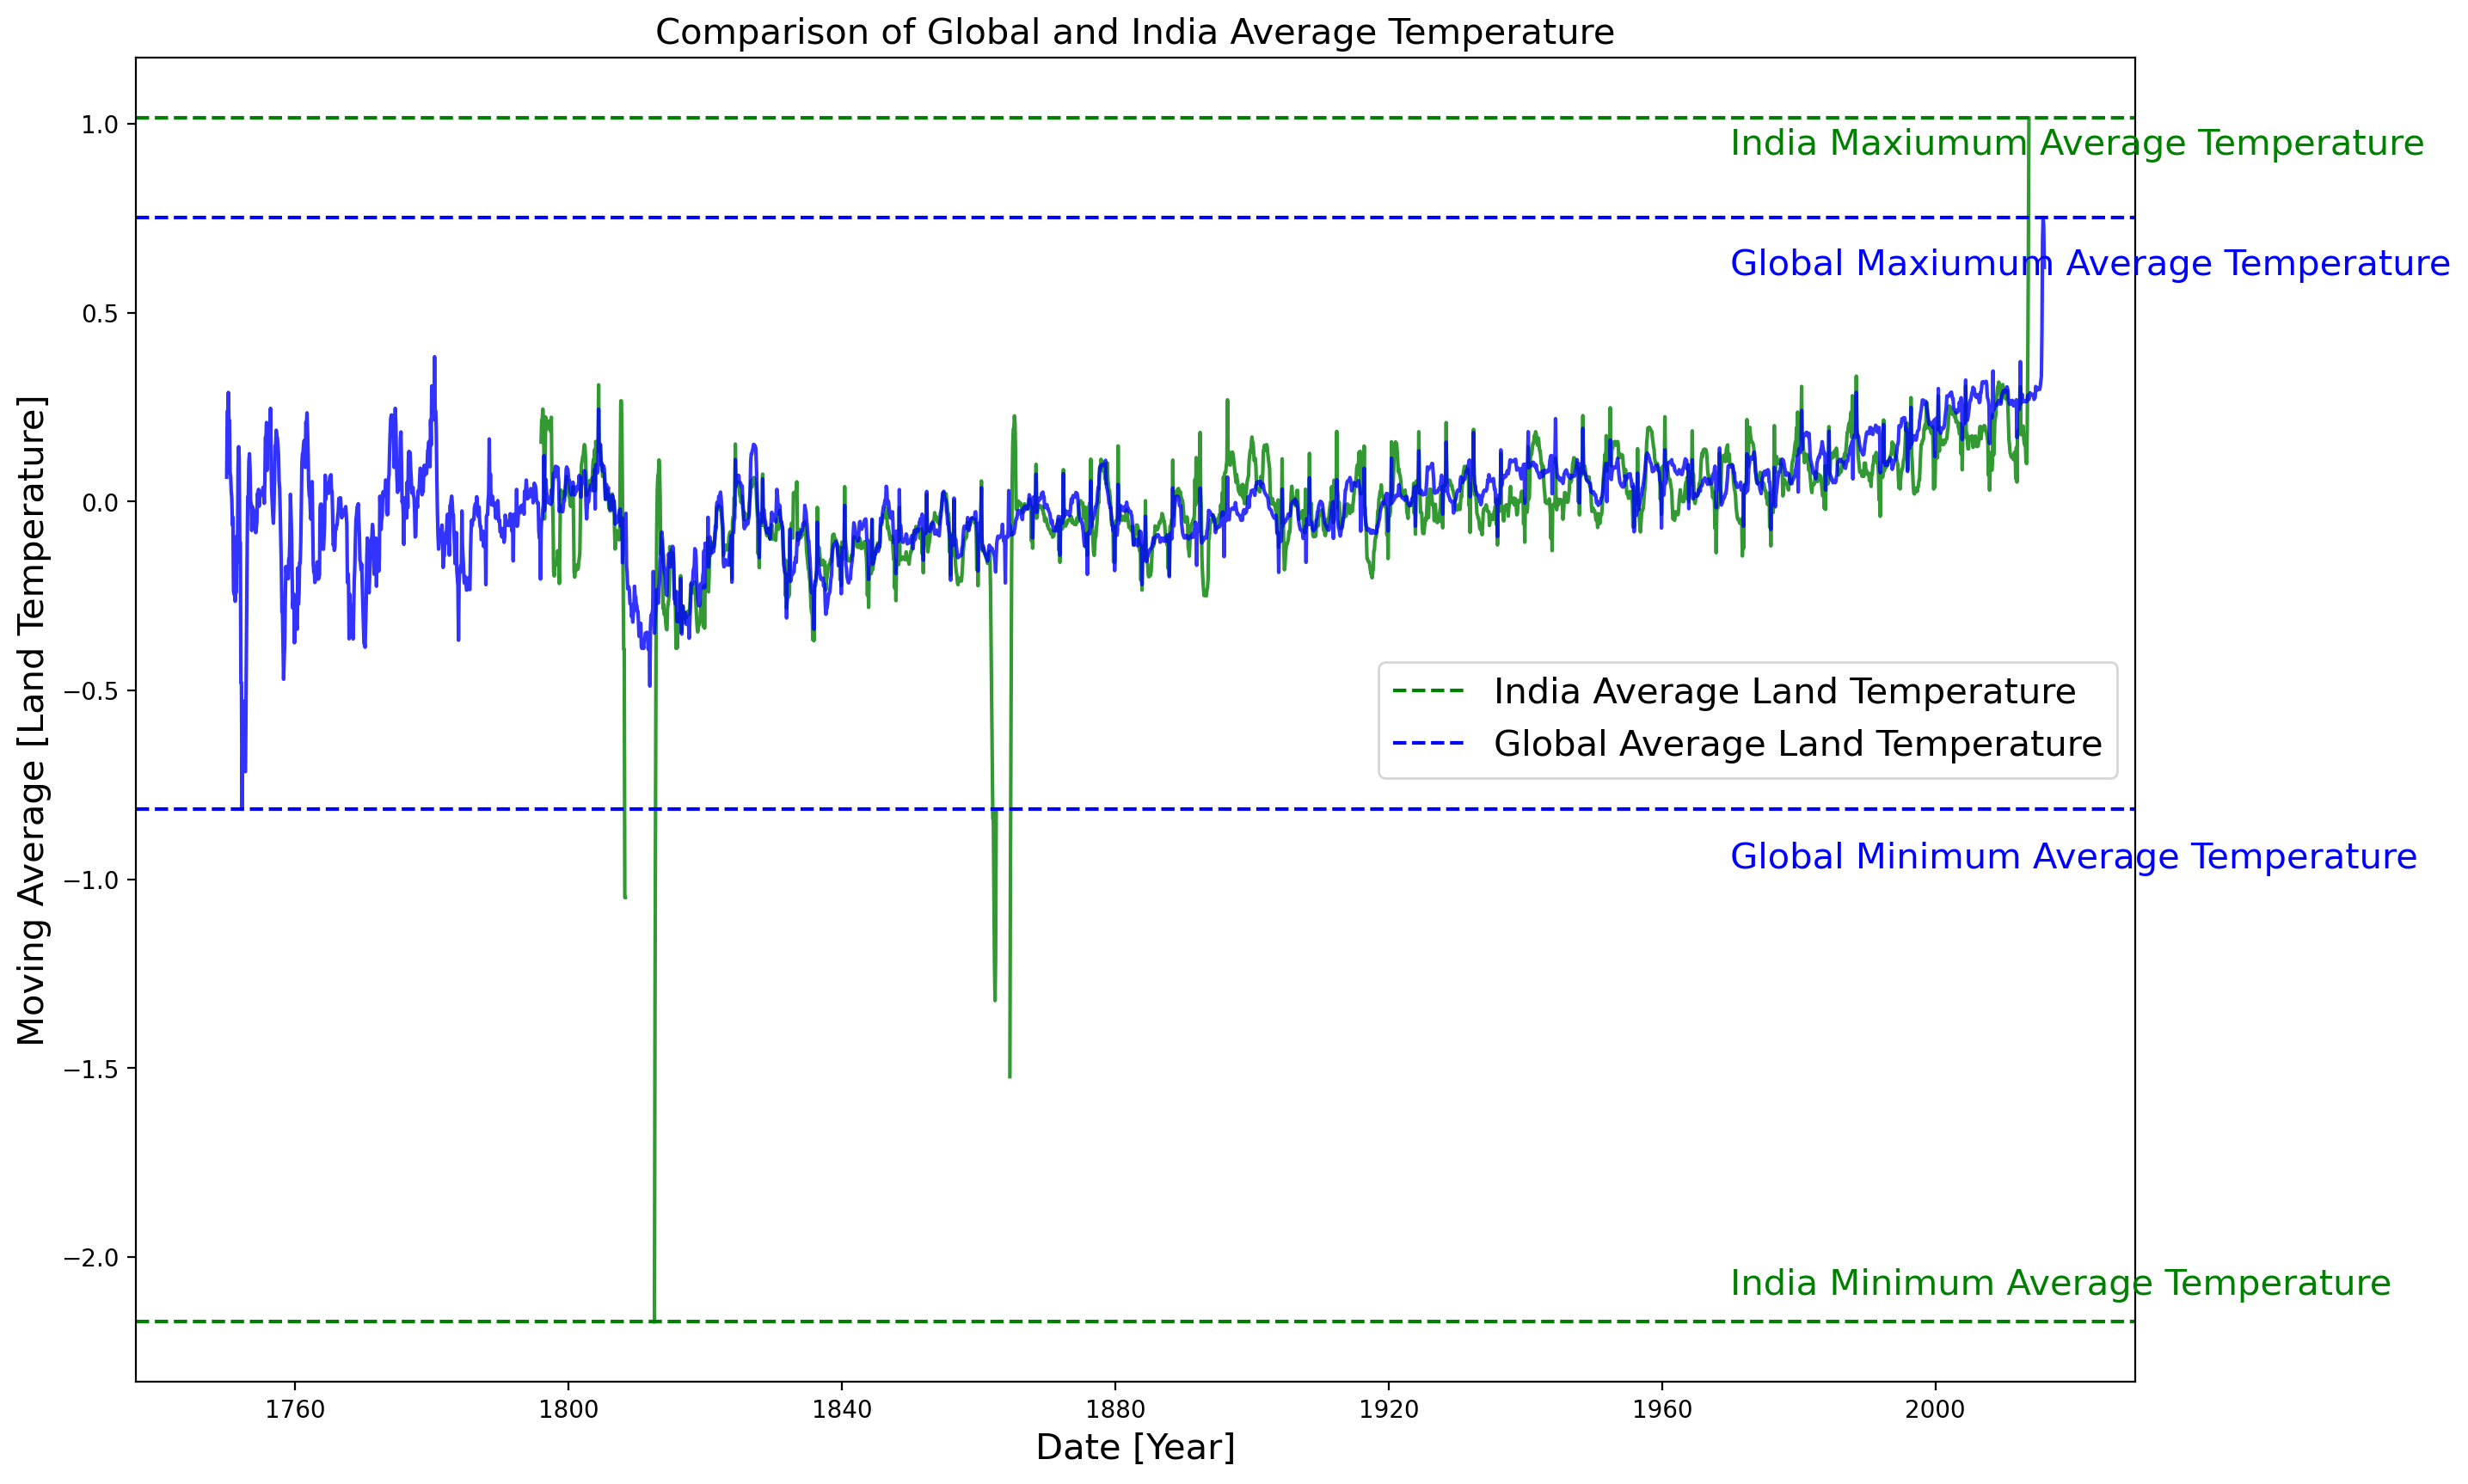

In [71]:
def min_max_temperature_comparison():
    '''comparing the min and max average land temperature of India with min and max of Global average land temperature'''
    
    india_min = normalised_india_temperature[normalised_india_temperature['MovingAverage'] == 
                            normalised_india_temperature['MovingAverage'].min()]


    india_max = normalised_india_temperature[normalised_india_temperature['MovingAverage'] == 
                            normalised_india_temperature['MovingAverage'].max()]  


    global_min = normalised_global_temperature[normalised_global_temperature['MovingAverage'] == 
                            normalised_global_temperature['MovingAverage'].min()]


    global_max = normalised_global_temperature[normalised_global_temperature['MovingAverage'] == 
                                normalised_global_temperature['MovingAverage'].max()]  
    
    print('Global minimum average temperature\n', global_min.MovingAverage)
    print('Global maximum average temperature\n', global_max.MovingAverage)
    print('India minimum average temperature\n', india_min.MovingAverage)
    print('India maximum average temperature\n', india_max.MovingAverage)


    plt.figure(figsize = (15, 10), dpi = 200)
    plt.plot(normalised_india_temperature.index, normalised_india_temperature.MovingAverage, color = 'green', alpha = 0.8)
    plt.plot(normalised_global_temperature.index, normalised_global_temperature.MovingAverage, color = 'blue', alpha = 0.8)

    plt.axhline(y = india_min['MovingAverage'].iloc[0], color = 'green', linestyle = '--', label = 'India Average Land Temperature')
    plt.axhline(y = india_max['MovingAverage'].iloc[0], color = 'green', linestyle = '--')
    plt.text(x = 0, y = -2.1, s = 'India Minimum Average Temperature', color = 'green', fontsize = 15)
    plt.text(x = 0, y = 0.92, s = 'India Maxiumum Average Temperature', color = 'green', fontsize = 15)


    plt.axhline(y = global_min['MovingAverage'].iloc[0], color = 'blue', linestyle = '--', label = 'Global Average Land Temperature')
    plt.axhline(y = global_max['MovingAverage'].iloc[0], color = 'blue', linestyle = '--')
    plt.text(x = 0, y = -0.97, s = 'Global Minimum Average Temperature', color = 'blue', fontsize = 15)
    plt.text(x = 0, y = 0.6, s = 'Global Maxiumum Average Temperature', color = 'blue', fontsize = 15)
    plt.title('Comparison of Global and India Average Temperature', fontsize = 15)
    plt.legend(loc = 5, fontsize = 15)
    plt.xlabel('Date [Year]', fontsize = 15)
    plt.ylabel('Moving Average [Land Temperature]', fontsize = 15)
    plt.savefig('/Users/preethu/Clustering & Fitting Images/Image3.png')
    plt.show()

min_max_temperature_comparison()

In [72]:
global_state_temperatures.set_index('dt', inplace = True)

In [73]:
global_state_temperatures.index = pd.to_datetime(global_state_temperatures.index, format = "%Y-%m-%d")
global_state_temperatures.sort_index(inplace = True)
global_state_temperatures.dropna(axis = 1, how = 'all', inplace = True)

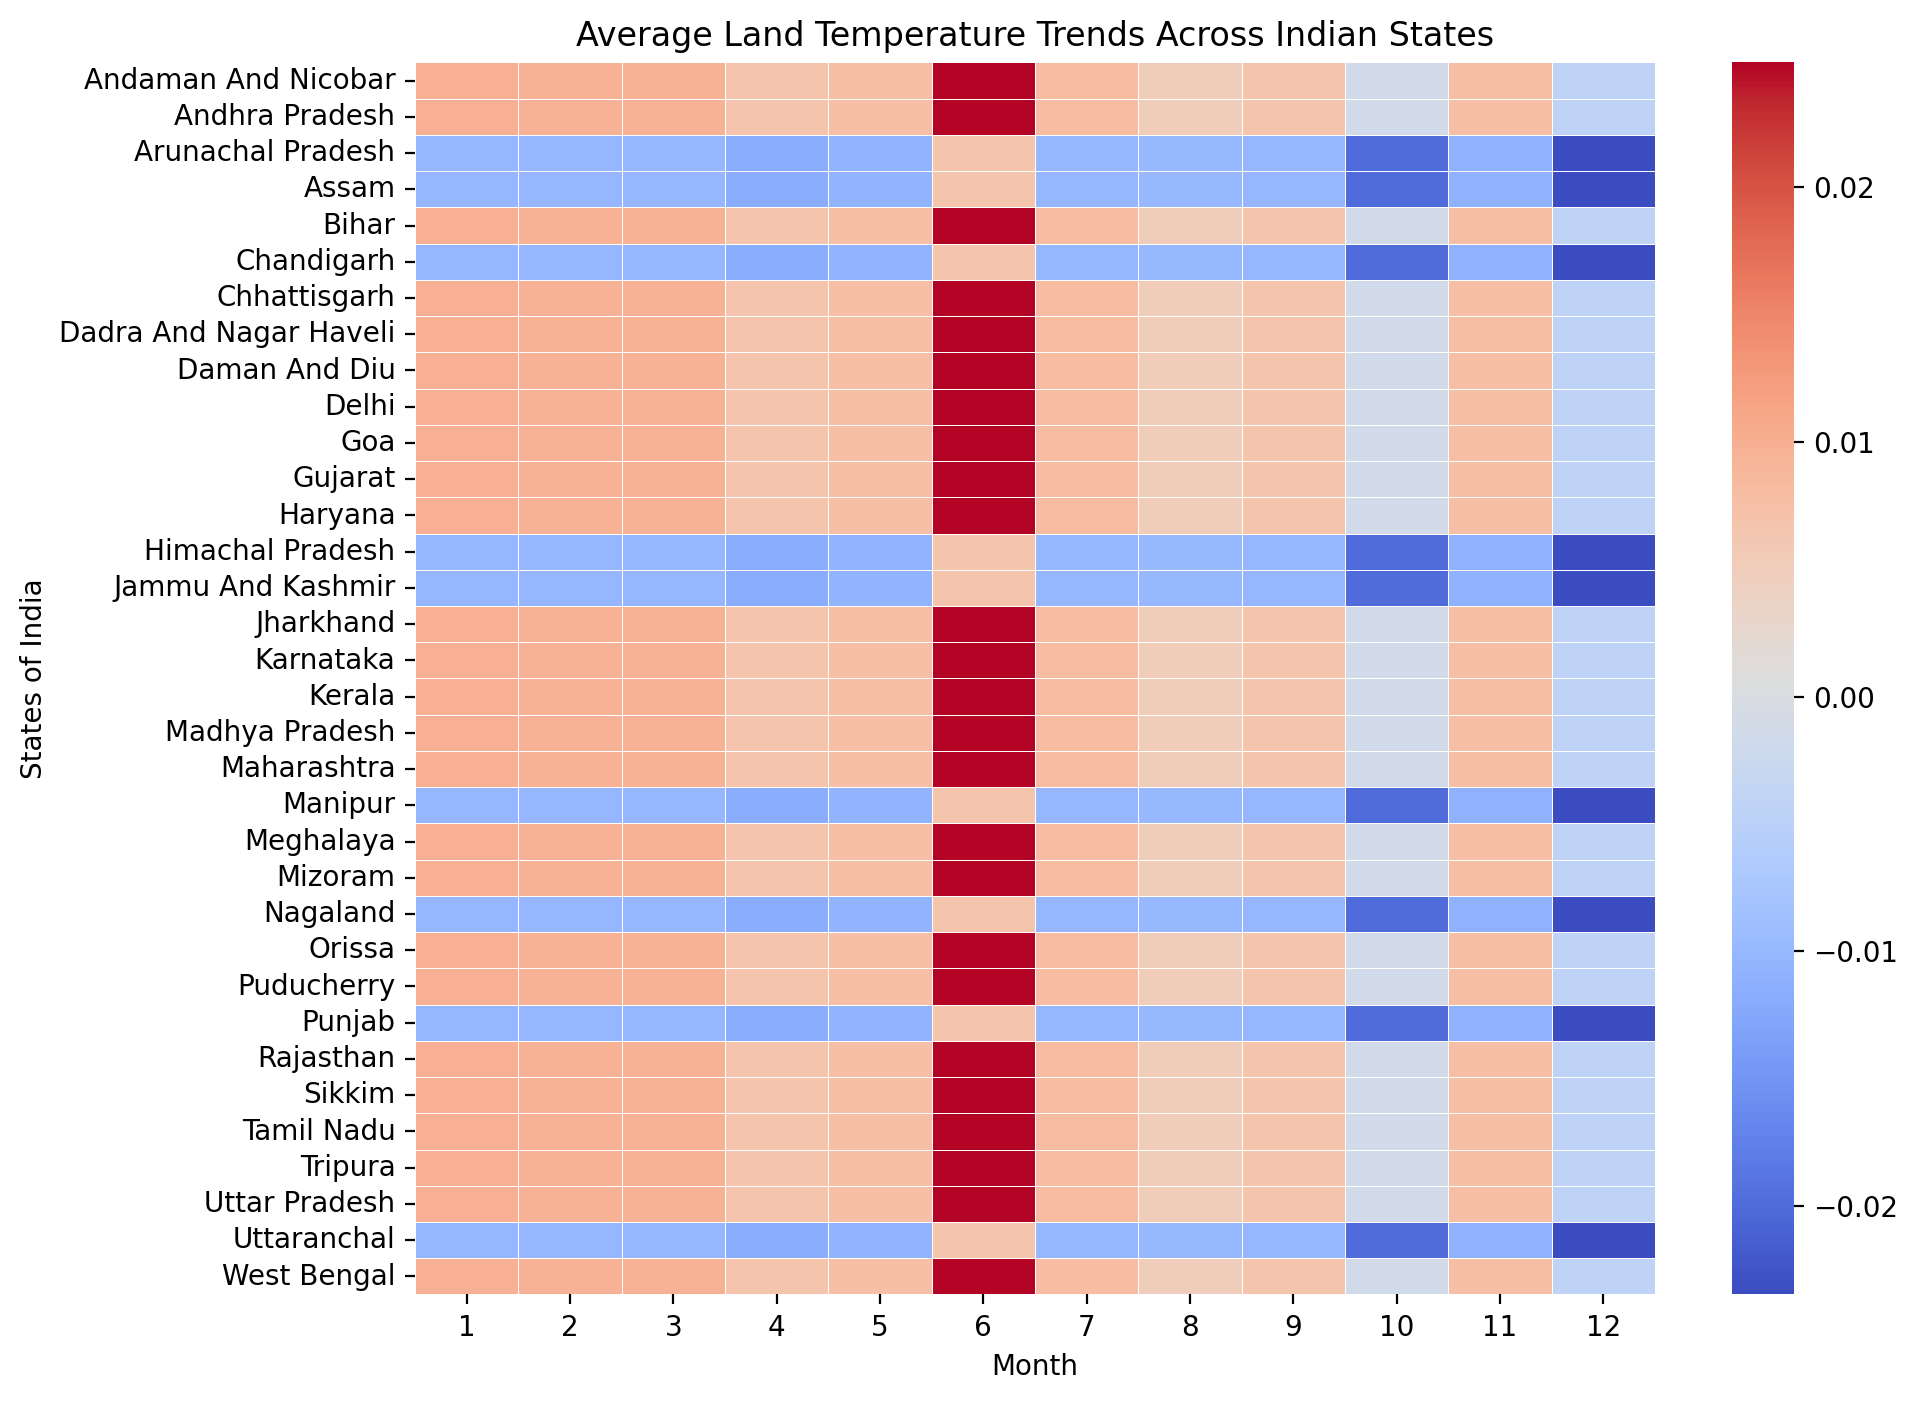

In [74]:
def india_states_temperature():
    '''heatmap to plot the average land temperature distribution of Indian states'''
    
    india_temperature = global_state_temperatures[(global_state_temperatures['Country'] == 'India')].copy()

    india_temperature['AverageTemperature'] = (india_temperature['AverageTemperature'] - india_temperature['AverageTemperature'].mean()) / india_temperature['AverageTemperature'].std()

    india_temperature['MovingAverage'] = india_temperature.AverageTemperature.rolling('365D', center = True).mean()

    heatmap_data = india_temperature.pivot_table(index = india_temperature.State, 
                                                 columns = india_temperature.index.month, 
                                                 values='MovingAverage',aggfunc = 'mean')

    plt.figure(figsize = (10, 8), dpi = 200)
    sns.heatmap(heatmap_data, cmap='coolwarm', linecolor='white', linewidths= 0.2)
    plt.title("Average Land Temperature Trends Across Indian States")
    plt.xlabel('Month')
    plt.ylabel('States of India')
    plt.savefig('/Users/preethu/Clustering & Fitting Images/Image4.png')
    plt.show()

india_states_temperature()

In [75]:
global_majorcity_temperatures.set_index('dt', inplace = True)

In [76]:
global_majorcity_temperatures.index = pd.to_datetime(global_majorcity_temperatures.index, format = "%Y-%m-%d")
global_majorcity_temperatures.sort_index(inplace = True)
global_majorcity_temperatures.dropna(axis = 1, how = 'all', inplace = True)

In [77]:
def fitting_function(x, a, b):
    '''Function for fitting a straight line, for curve_fit'''

    y = a*x + b
    return y

       MovingAverage     residuals  significance
count   36582.000000  3.658200e+04  36582.000000
mean       18.162348  1.419238e-10     10.649054
std         1.438911  1.031504e+00     17.669043
min         9.637588 -6.986636e+00      0.010230
25%        17.572718 -2.292262e-01      3.155420
50%        18.573321  9.854525e-02      6.082230
75%        18.981942  3.864383e-01     10.762902
max        23.434757  3.538793e+00    139.732729


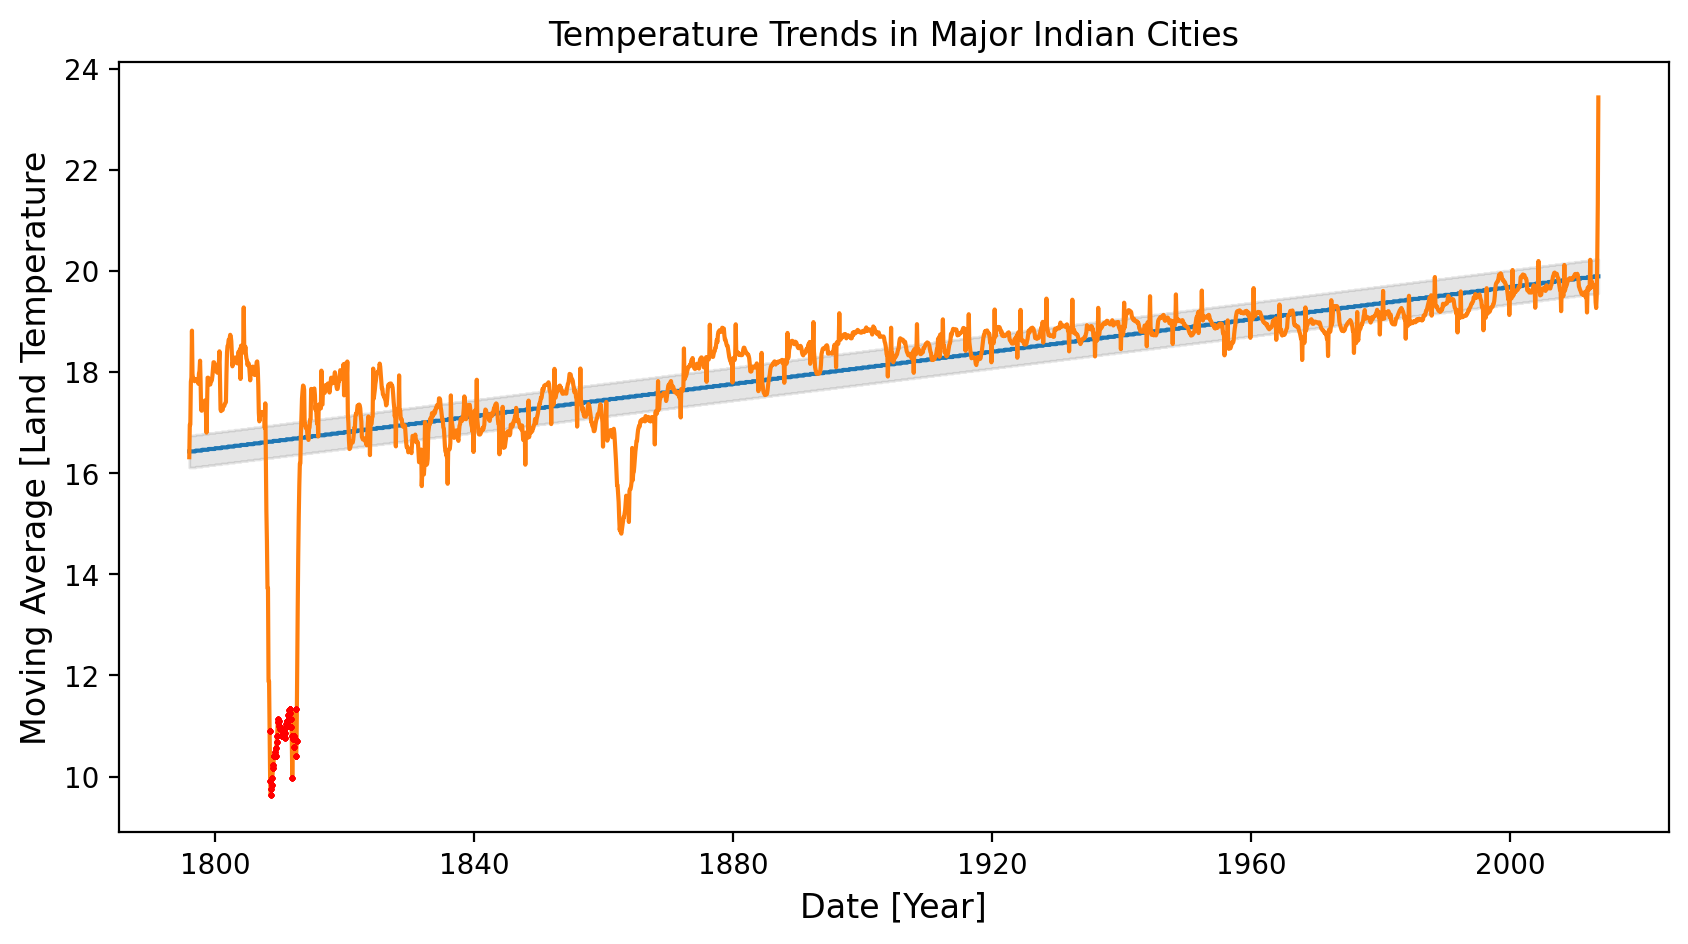

In [78]:
from scipy.optimize import curve_fit

def curve_fit_india_major_cities():
    
    global_majorcity_temperatures['MovingAverage'] = global_majorcity_temperatures.AverageTemperature.rolling('365D', center = True).mean()

    india_majorcity = global_majorcity_temperatures[global_majorcity_temperatures.Country == 'India']

    cleaned_india_majorcity = india_majorcity.dropna(axis = 1).copy()

    x = cleaned_india_majorcity.index.year
    y = cleaned_india_majorcity.MovingAverage


    p, cov = curve_fit(fitting_function, x, y)
    yerr = 0.05

    cleaned_india_majorcity['residuals'] = cleaned_india_majorcity.MovingAverage - (fitting_function(cleaned_india_majorcity.index.year, p[0], p[1]))
    cleaned_india_majorcity['significance'] = cleaned_india_majorcity.residuals.abs() / yerr
    print(cleaned_india_majorcity.describe())

    sigma = np.sqrt(np.diag(cov))

    plt.figure(figsize = (10, 5), dpi = 200)
    plt.plot(cleaned_india_majorcity.index, fitting_function(cleaned_india_majorcity.index.year, p[0], p[1]))
    plt.plot(cleaned_india_majorcity.index, cleaned_india_majorcity.MovingAverage)
    plt.fill_between(cleaned_india_majorcity.index, fitting_function(cleaned_india_majorcity.index.year, p[0] - sigma[0], p[1] - sigma[1]), 
                 fitting_function(cleaned_india_majorcity.index.year, p[0] + sigma[0], p[1] + sigma[1]), color = 'k', alpha = 0.1)
    
    sig = cleaned_india_majorcity[cleaned_india_majorcity.significance > 100].copy()
    plt.errorbar(sig.index, sig.MovingAverage, yerr = yerr, lw = 0, elinewidth = 1, marker = 'o', ms = 1, 
             color = 'red')
    plt.xlabel('Date [Year]', fontsize = 12)
    plt.ylabel('Moving Average [Land Temperature', fontsize = 12)
    plt.title('Temperature Trends in Major Indian Cities', fontsize = 12)
    plt.savefig('/Users/preethu/Clustering & Fitting Images/Image5.png')
    plt.show()

curve_fit_india_major_cities()

In [79]:
india_temperature = global_country_temperatures[
    (global_country_temperatures['Country'] == 'India') &
    (global_country_temperatures.index >= pd.to_datetime('2012-01-01')) &
    (global_country_temperatures.index <= pd.to_datetime('2012-12-31'))]

cleaned_india_temperature = india_temperature.dropna(axis = 0).copy()

In [80]:
autocorr_lag1 = cleaned_india_temperature['AverageTemperature'].autocorr(lag=1)

print("Autocorrelation at lag=1:", autocorr_lag1)

Autocorrelation at lag=1: 0.7771845490237671


In [81]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

def one_silhoutte_inertia(n, xy): 
    ''' Calculates the silhoutte score and WCSS for n clusters '''

    # set up the clusterer with the number of expected clusters
    kmeans = KMeans(n_clusters=n, n_init=20)
    # Fit the data
    kmeans.fit(xy)
    labels = kmeans.labels_
    
    # calculate the silhoutte score
    score = silhouette_score(xy, labels)
    inertia = kmeans.inertia_

    return score, inertia

In [82]:
def plot_elbow_method(min_k, max_k, wcss, best_n):
    ''' Plots the elbow method between min_k and max_k '''

    fig, ax = plt.subplots(dpi = 200)
    ax.plot(range(min_k, max_k + 1), wcss, 'kx-')
    ax.scatter(best_n, wcss[best_n-min_k], marker = 'o', color = 'red', facecolors = 'none', s = 50)
    ax.set_xlabel('K - clusters')
    ax.set_xlim(min_k, max_k)
    ax.set_ylabel('WCSS')
    plt.savefig('/Users/preethu/Clustering & Fitting Images/Image6.png')
    plt.show()
    return

In [83]:
feature = cleaned_india_temperature['AverageTemperature'].values.reshape(-1, 1).copy()
scaler = MinMaxScaler()
norm = scaler.fit_transform(feature)
inv_norm = scaler.inverse_transform(norm)

 2 clusters silhoutte score = 0.65
 3 clusters silhoutte score = 0.63
 4 clusters silhoutte score = 0.68
 5 clusters silhoutte score = 0.63
 6 clusters silhoutte score = 0.56
 7 clusters silhoutte score = 0.60
 8 clusters silhoutte score = 0.56
 9 clusters silhoutte score = 0.44
10 clusters silhoutte score = 0.29
Best number of clusters =  4


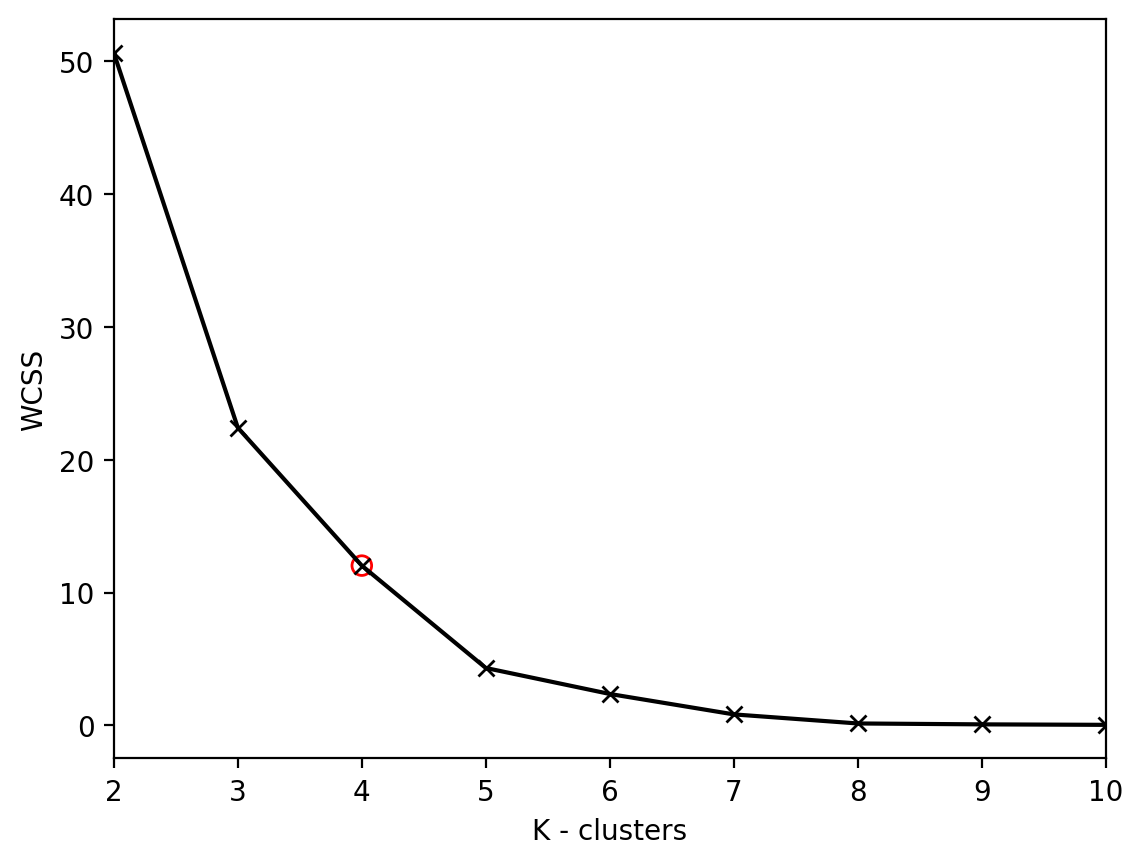

In [84]:
from sklearn.preprocessing import MinMaxScaler

def number_of_clusters_identification():
    '''Identifying the number of clusters using silhouette score and elbow method'''

    wcss = []
    best_n, best_score = None, -np.inf
    for n in range(2, 11):  # 2 to 10 clusters
        score, inertia = one_silhoutte_inertia(n, feature)
        wcss.append(inertia)
        if score > best_score:
            best_n = n
            best_score = score
        print(f"{n:2g} clusters silhoutte score = {score:0.2f}")

    print(f"Best number of clusters = {best_n:2g}")
    plot_elbow_method(2, 10, wcss, best_n)

number_of_clusters_identification()

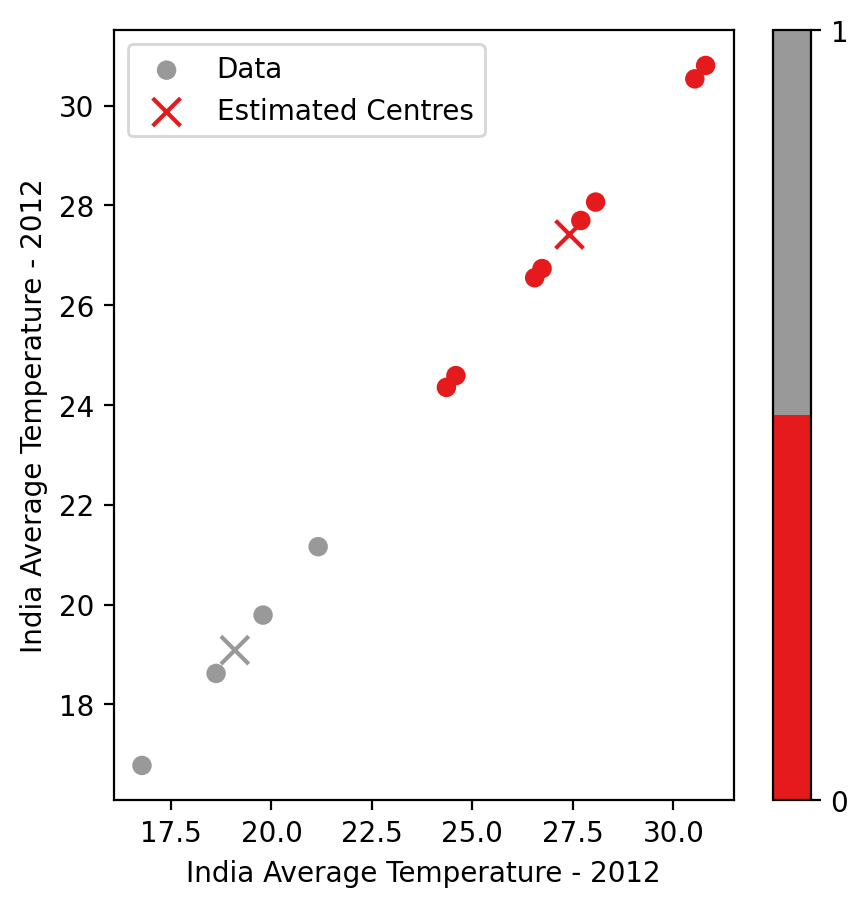

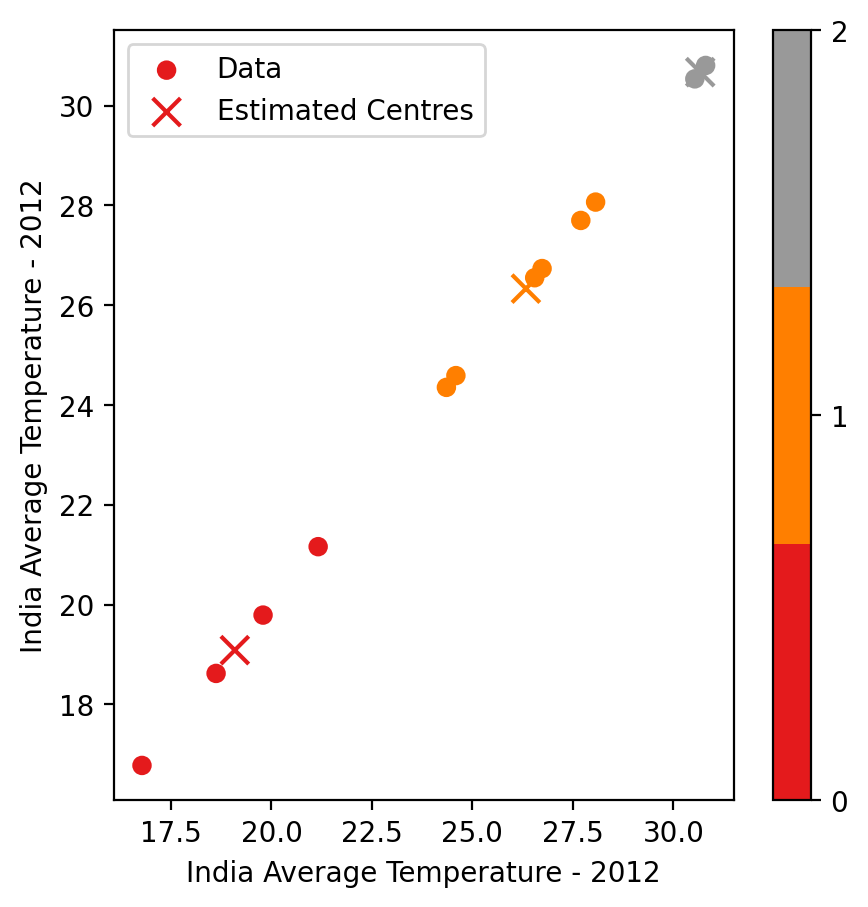

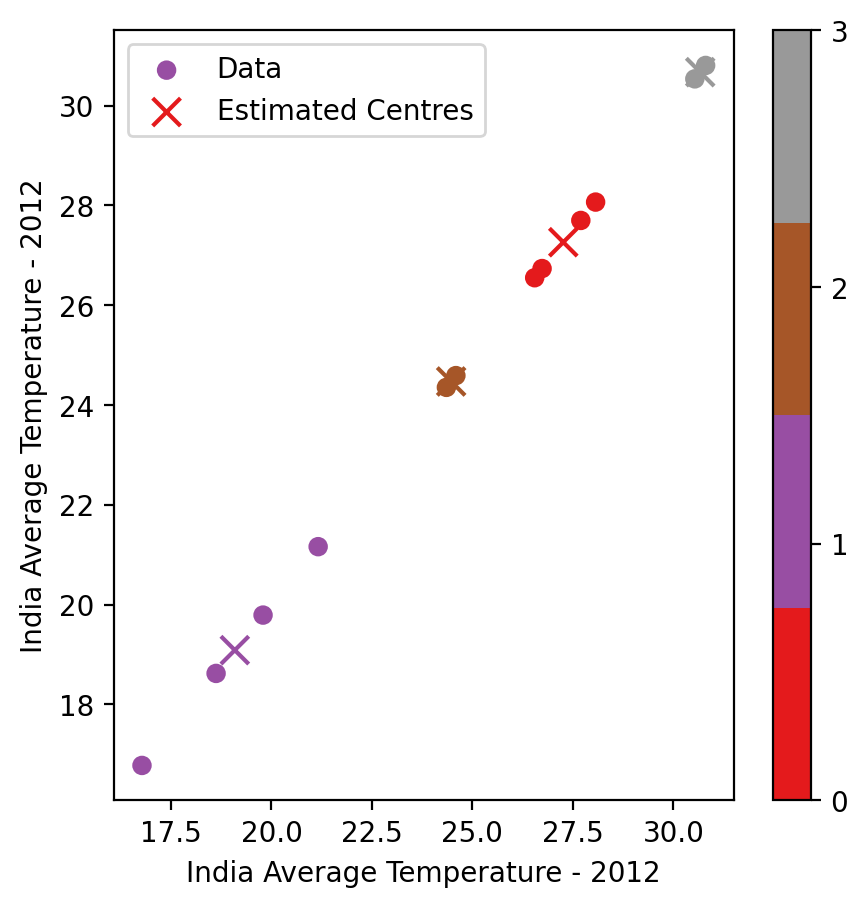

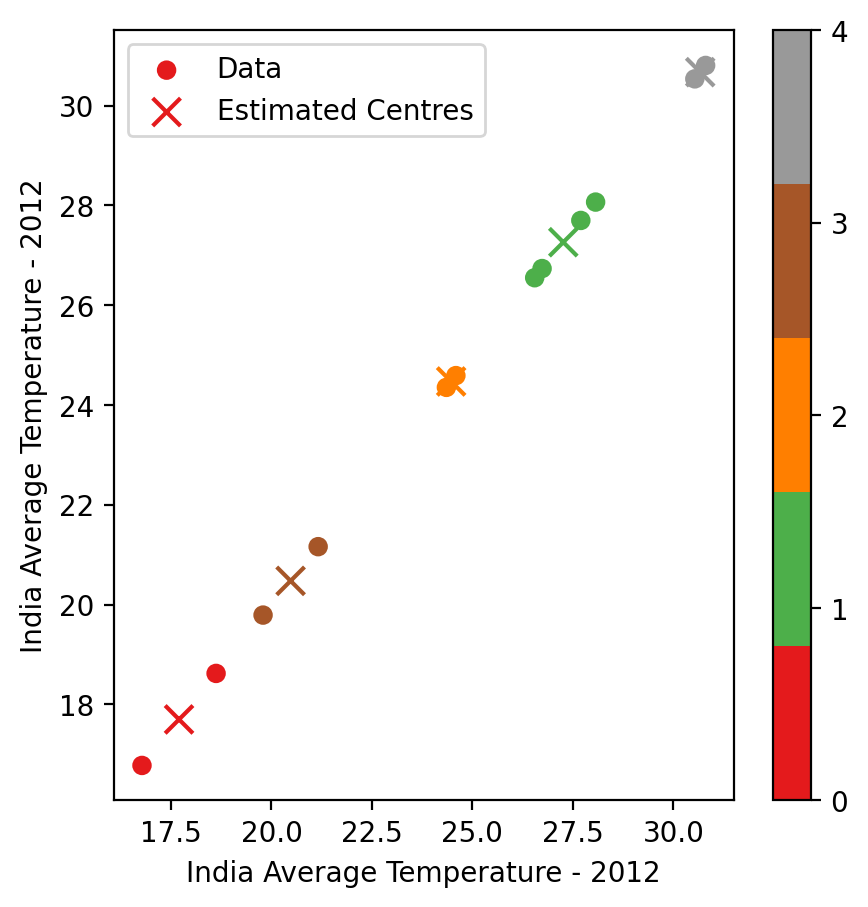

In [85]:
from matplotlib.colors import ListedColormap

def plot_fitted_average_temperature(labels, xy, xkmeans, ykmeans, centre_labels):
    '''Plots clustered data as a scatter plot with determined centres shown'''
    
    colours = plt.cm.Set1(np.linspace(0, 1, len(np.unique(labels))))
    cmap = ListedColormap(colours)
    
    fig, ax = plt.subplots(dpi = 200, figsize = (5, 5))
    s = ax.scatter(xy[:, 0], xy[:, 0], c = labels, cmap = cmap, marker = 'o', label = 'Data')
    ax.scatter(xkmeans, ykmeans, c = centre_labels, cmap = cmap, marker = 'x', s = 100, label = 'Estimated Centres')
    cbar = fig.colorbar(s, ax = ax)
    cbar.set_ticks(np.unique(labels))
    ax.legend()
    ax.set_xlabel('India Average Temperature - 2012')
    ax.set_ylabel('India Average Temperature - 2012')
    file_path = f'/Users/preethu/Clustering & Fitting Images/Image{k}.png'
    plt.savefig(file_path)    
    plt.show()
    return

inv_norm = scaler.inverse_transform(norm)  
for k in range(2, 6):
    kmeans = KMeans(n_clusters=k, n_init=20)
    kmeans.fit(norm)     
    labels = kmeans.labels_
    # the estimated cluster centres
    cen = scaler.inverse_transform(kmeans.cluster_centers_)
    xkmeans = cen[:, 0]
    ykmeans = cen[:, 0]
    cenlabels = kmeans.predict(kmeans.cluster_centers_)
    plot_fitted_average_temperature(labels, inv_norm, xkmeans, ykmeans, cenlabels)